In [1]:
from typing import Literal, Optional, Union

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.quantum_info import SparsePauliOp

# 5 - Primitives

## Exercise 1

Define a function able to execute an input circuit either with Sampler or Estimator, using a second parameter to choose what to run. It should employ for every case the necessary parameters, and return the correspondant outputs.

In [2]:
def run_circuit(
    qc: QuantumCircuit,
    executor: Literal["sampler", "estimator"],
    observable: Optional[SparsePauliOp] = None,
):
    if executor == "sampler":
        qc_with_measure = qc.copy()
        qc_with_measure.measure_all()
        sampler = StatevectorSampler()
        job = sampler.run([qc_with_measure])
        result = job.result()
        return result

    elif executor == "estimator":
        if observable is None:
            observable = SparsePauliOp("Z" * qc.num_qubits)

        estimator = StatevectorEstimator()
        job = estimator.run([(qc, observable)])
        result = job.result()
        return result

    else:
        raise ValueError("Invalid executor type. Must be 'sampler' or 'estimator'.")

Creamos un circuito para probar la función

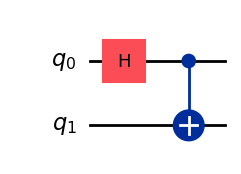

In [3]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

display(qc.draw(output="mpl"))

- `Sampler`

In [4]:
result = run_circuit(qc, "sampler")
result[0].data.meas.get_counts()
print(type(result))

<class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>


- `Estimator`

In [5]:
result = run_circuit(qc, "estimator")
result[0].data.evs.item()

print(type(result))

<class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>


## Exercise 2

Adapt the function so it allows a list of circuits as input and try it.

In [6]:
def run_circuit(
    qc: Union[QuantumCircuit, list[QuantumCircuit]],
    executor: Literal["sampler", "estimator"],
    observable: Optional[SparsePauliOp] = None,
):
    if not isinstance(qc, list):
        circuits = [qc]
    else:
        circuits = qc

    if executor == "sampler":
        qc_with_measures = []
        for circuit in circuits:
            qc_with_measure = circuit.copy()
            qc_with_measure.measure_all()
            qc_with_measures.append(qc_with_measure)

        sampler = StatevectorSampler()
        job = sampler.run(qc_with_measures)
        result = job.result()
        return result

    elif executor == "estimator":
        jobs_to_run = []
        for circuit in circuits:
            if observable is None:
                obs = SparsePauliOp("Z" * circuit.num_qubits)
            else:
                obs = observable

            jobs_to_run.append((circuit, obs))

        estimator = StatevectorEstimator()
        job = estimator.run(jobs_to_run)
        result = job.result()
        return result

    else:
        raise ValueError("Invalid executor type. Must be 'sampler' or 'estimator'.")

Primero crearemos una lista de dos circuitos cuánticos simples.

Circuit 1:


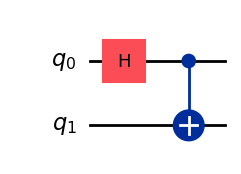


Circuit 2:


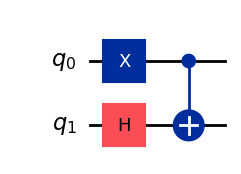

In [7]:
qc1 = QuantumCircuit(2, name="Circuit 1")
qc1.h(0)
qc1.cx(0, 1)

qc2 = QuantumCircuit(2, name="Circuit 2")
qc2.x(0)
qc2.h(1)
qc2.cx(0, 1)

circuits_to_run = [qc1, qc2]

print("Circuit 1:")
display(qc1.draw(output="mpl"))
print("\nCircuit 2:")
display(qc2.draw(output="mpl"))

- `sampler`

In [8]:
sampler_results = run_circuit(circuits_to_run, "sampler")

print("Sampler Results:")
for i, result in enumerate(sampler_results):
    print(f"\nResults for Circuit {i+1}")
    print(result.data.meas.get_counts())

Sampler Results:

Results for Circuit 1
{'00': 513, '11': 511}

Results for Circuit 2
{'11': 508, '01': 516}


- `Estimator`

In [9]:
estimator_results = run_circuit(circuits_to_run, "estimator")

print("Estimator Results:")
for i, result in enumerate(estimator_results):
    print(f"\nResults for Circuit {i+1}:")
    print(result.data.evs.item())

Estimator Results:

Results for Circuit 1:
0.9999999999999998

Results for Circuit 2:
0.0
